In [5]:
import matplotlib.pyplot as plot
import numpy as np

data = [[143, 3100], [295, 6500], [295, 6500], [171, 2330],
            [232, 5805], [109, 5350], [262, 6050], [422, 7750],
            [225, 2925], [126, 2890], [275, 5710], [179, 3490]]

## 普通最小二乘法( Ordinary Least Square,OLS)

训练的目标是为了最小化
$$ min_θ\frac{1}{2m}\sum_{i=1}^{m}(h_θ(x^i)-y^i)^2 $$


In [6]:
def sigma_squa_x(x):
    return sum([i**2 for i in x])
def sigma_x(x):
    return sum(x)
def sigma_xy(x,y):
    return sum([i*j for i,j in zip(x,y)])
def sigma_y(y):
    return sum(y)
x = [d[0] for d in data]
y = [d[1] for d in data]
m = len(x)

使用最小二乘法的参数估计可以求得：
$$ w={\sum_{i=1}^mx_iy_i - \overline y \sum_{i=1}^mx_i \over \sum_{i=1}^mx_i^2 - \overline x \sum_{i=1}^mx_i} = {\sum_{i=1}^m(x_i - \overline x)(y_i - \overline y) \over \sum_{i=1}^m(x_i - \overline x)^2} $$

In [7]:
w = (sigma_xy(x,y) - sigma_x(x)*sigma_y(y)*(1/m)) / (sigma_squa_x(x) - sigma_x(x)**2*(1/m))

$$ b = \overline y - w\overline x $$

In [13]:
b = sigma_y(y)*(1/m) - w * sigma_x(x)*(1/m)

15.712954244828092 1286.7319245533326


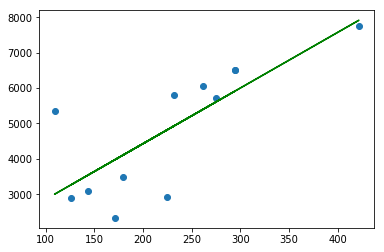

In [29]:
print(w,b)
plot.scatter(x, y)
plot.plot(x, w*np.array(x)+b, 'g-')
plot.show()

## 多元线性回归（Gradient Descent）
下面是最小二乘法的通式

$$ L(w,b)=L(\hat{w})=(y-X\hat{w})^T(y-X\hat{w}) $$

$$ \hat{w}^* = (X^TX)^{-1}X^Ty $$

In [30]:
def least_square(points):
    x_mat = np.mat(np.array([np.ones([len(points)]), points[:, 0]]).T)
    y_mat = points[:, 1].reshape(len(points), 1)
    xT_x=x_mat.T * x_mat
    if np.linalg.det(xT_x) == 0.0:
        print('this matrix is singular,cannot inverse')  # 奇异矩阵，不存在逆矩阵
        return
    coefficient_mat = xT_x.I * (x_mat.T * y_mat)
    return coefficient_mat[0, 0], coefficient_mat[1, 0]

In [32]:
n_data = np.array(data)
w2,b2 = least_square(n_data)

[[1286.73192455]
 [  15.71295424]]


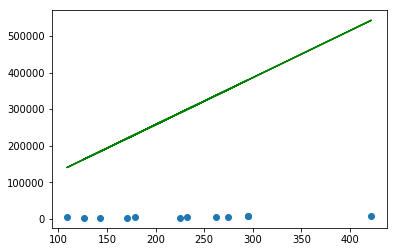

In [33]:
plot.scatter(x, y)
plot.plot(x, w2*np.array(x)+b2, 'g-')
plot.show()